<a href="https://colab.research.google.com/github/gladisa1/Fastag-Fraud-Detection/blob/main/Medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
working=pd.read_excel("/content/research.xlsx", sheet_name="Sheet1", header= 1)

In [3]:
housewives=pd.read_excel("/content/research.xlsx", sheet_name="Sheet2", header= 1)

In [4]:
working.head()

,Sr.no,Name,Age,Occupation,Marital Status,Height(cm),Weight(kg),BMI(kg/m2),Sitting(hrs),Walking(MET),Moderate(MET),Vigorous(MET),IPAQ Score,Category
0,1,Sharwani Jawalekar,20,Customer Care,Unmarried,164,60.0,22.3,8.5,693,1440,5760,7893,3
1,2,Piyoshi Paturkar,22,Data analyst,Unmarried,158,60.0,24.0,6.0,1386,0,0,1386,2
2,3,Aishwarya Yadav,23,Service,Unmarried,159,58.0,22.9,5.0,1386,0,0,1386,2
3,4,Ruruja Joshi,23,Service,Unmarried,158,53.0,21.2,9.0,792,1440,0,2232,2
4,5,Wellseeta Dsouza,23,IT worker,Unmarried,161,62.0,23.4,8.0,1440,480,462,2382,2


In [5]:
housewives.head()

,Sr.no,Name,Age,Occupation,Marital Status,Height(cm),Weight(kg),BMI(kg/m2),Sitting(hrs),Walking(MET),Moderate(MET),Vigorous(MET),IPAQ Score,Category
0,1,Aparna Kamble,22,Homemaker,Married,146,52,24.4,3.0,396,240,0,636,2
1,2,Rukmini Sarote,22,Homemaker,Married,164,75,27.9,5.0,693,0,0,693,1
2,3,Nikita Bhonda,24,Homemaker,Married,158,60,24.0,6.0,462,0,0,462,1
3,4,Kanchan Ghadge,25,Homemaker,Married,164,48,17.8,3.0,346,1200,0,1546,2
4,5,Sangeeta Pawar,25,Homemaker,Married,160,52,20.3,1.0,346,240,1200,1786,2


In [6]:
working.isnull().sum()

,0
Sr.no,0
Name,0
Age,0
Occupation,0
Marital Status,0
Height(cm),0
Weight(kg),0
BMI(kg/m2),0
Sitting(hrs),0
Walking(MET),0


In [7]:
housewives.isnull().sum()

,0
Sr.no,0
Name,0
Age,0
Occupation,0
Marital Status,0
Height(cm),0
Weight(kg),0
BMI(kg/m2),0
Sitting(hrs),0
Walking(MET),0


In [8]:
print(working.info())

print(housewives.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sr.no           63 non-null     int64  
 1   Name            63 non-null     object 
 2   Age             63 non-null     int64  
 3   Occupation      63 non-null     object 
 4   Marital Status  63 non-null     object 
 5   Height(cm)      63 non-null     int64  
 6   Weight(kg)      63 non-null     float64
 7   BMI(kg/m2)      63 non-null     float64
 8   Sitting(hrs)    63 non-null     float64
 9   Walking(MET)    63 non-null     int64  
 10  Moderate(MET)   63 non-null     int64  
 11  Vigorous(MET)   63 non-null     int64  
 12  IPAQ Score      63 non-null     int64  
 13  Category        63 non-null     int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 7.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Co

In [9]:
drop_cols = ["Sr.no"]
working = working.drop(columns=drop_cols)
housewives = housewives.drop(columns=drop_cols)


--- Working Women ---


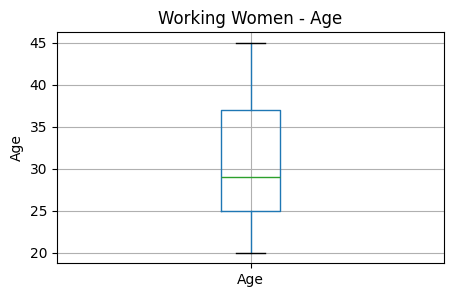

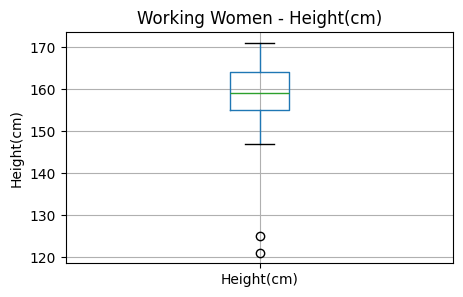

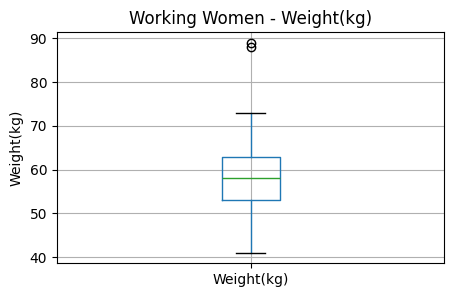

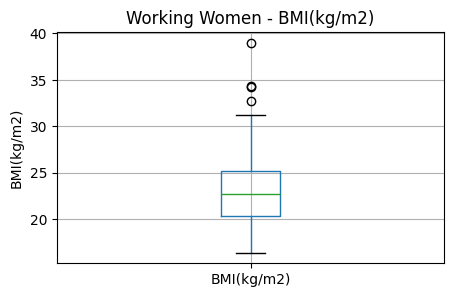

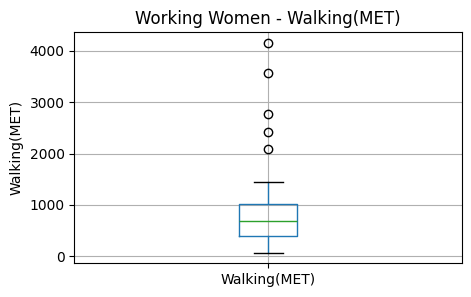

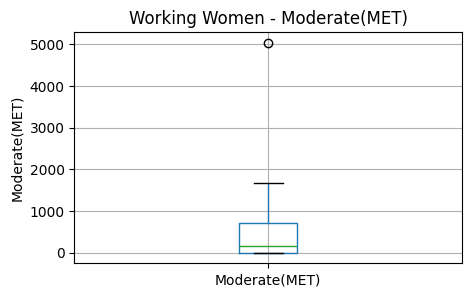

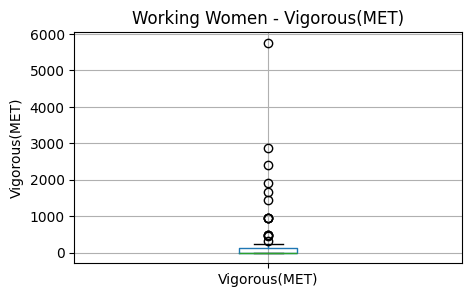

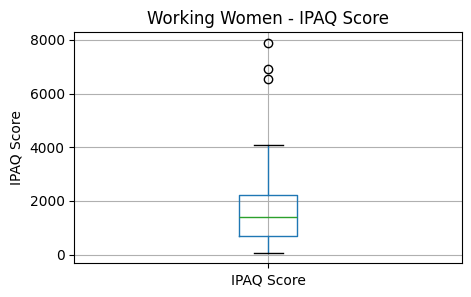


--- Housewives ---


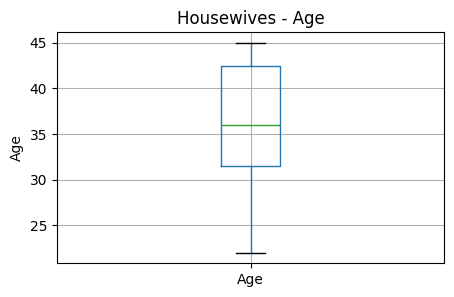

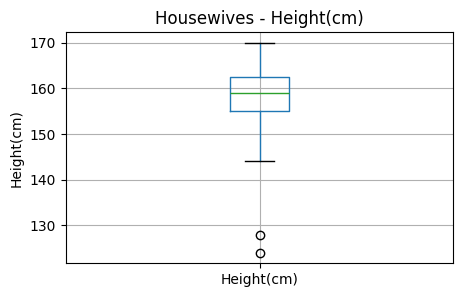

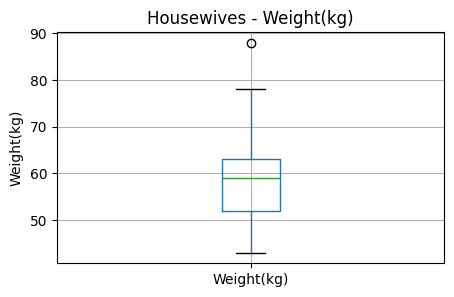

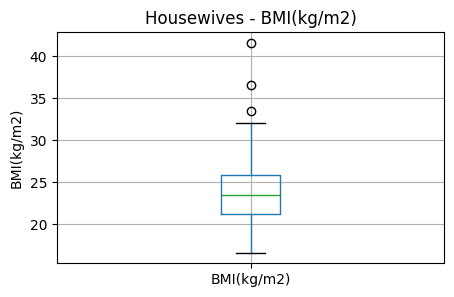

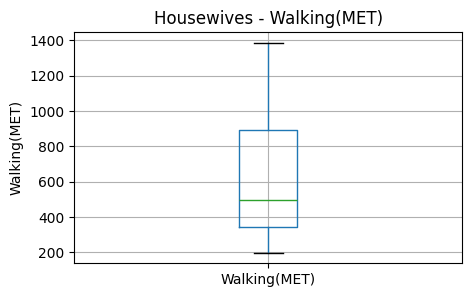

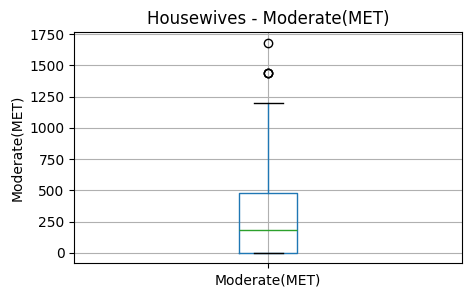

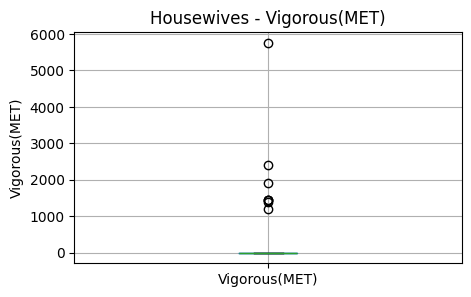

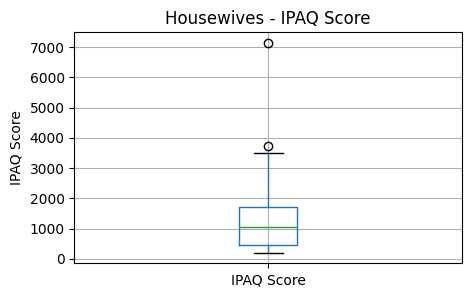

In [10]:
import matplotlib.pyplot as plt


numeric_cols = ["Age", "Height(cm)", "Weight(kg)", "BMI(kg/m2)",
                "Walking(MET)", "Moderate(MET)", "Vigorous(MET)", "IPAQ Score"]


def check_outliers_boxplot(df, group_name):
    print(f"\n--- {group_name} ---")
    for col in numeric_cols:
        plt.figure(figsize=(5,3))
        df.boxplot(column=col)
        plt.title(f"{group_name} - {col}")
        plt.ylabel(col)
        plt.show()


check_outliers_boxplot(working, "Working Women")
check_outliers_boxplot(housewives, "Housewives")


Accuracy: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89        12
           3       0.00      0.00      0.00         3

    accuracy                           0.84        19
   macro avg       0.60      0.67      0.63        19
weighted avg       0.72      0.84      0.77        19


Confusion Matrix:
 [[ 4  0  0]
 [ 0 12  0]
 [ 0  3  0]]


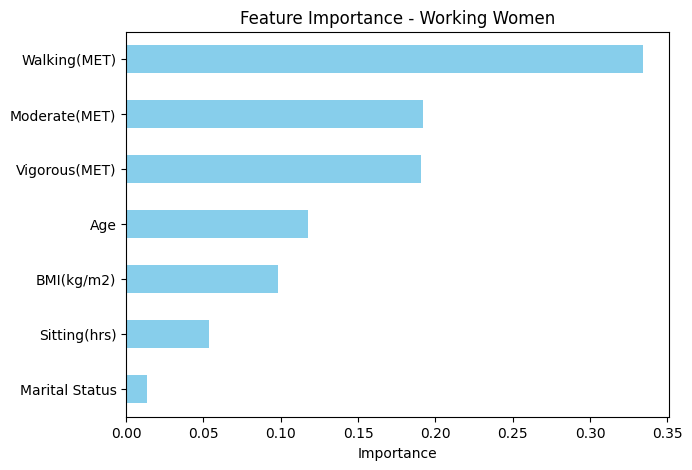

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


X = working[["Age", "BMI(kg/m2)", "Sitting(hrs)", "Marital Status",
             "Walking(MET)", "Moderate(MET)", "Vigorous(MET)"]]
y = working["Category"]

le_mar = LabelEncoder()
X["Marital Status"] = le_mar.fit_transform(X["Marital Status"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

importances = pd.Series(clf.feature_importances_, index=X.columns)

plt.figure(figsize=(7,5))
importances.sort_values().plot(kind="barh", color="skyblue")
plt.title("Feature Importance - Working Women")
plt.xlabel("Importance")
plt.show()


#Count of Women with Vigouros Activity

In [12]:
count_women_vigorous = working[(working['Vigorous(MET)'] > 0)].shape[0]

print(count_women_vigorous)

16


In [13]:
count_housewives_vigorous = housewives[(housewives['Vigorous(MET)'] > 0)].shape[0]

print(count_housewives_vigorous)

8


#Count of Women with Moderate Activity

In [14]:
count_women_moderate = working[(working['Moderate(MET)'] > 0)].shape[0]

print(count_women_moderate)

33


In [15]:
count_housewives_moderate = housewives[(housewives['Moderate(MET)'] > 0)].shape[0]

print(count_housewives_moderate)

33


#Count of Women with Walking Activity

In [16]:
count_women_walking = working[(working['Walking(MET)'] > 0)].shape[0]

print(count_women_walking)

63


In [17]:
count_housewives_walking = housewives[(housewives['Walking(MET)'] > 0)].shape[0]

print(count_housewives_walking)

63


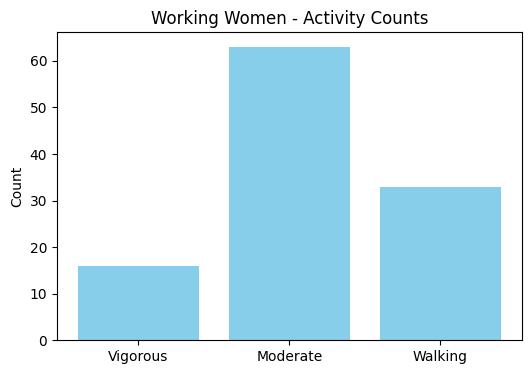

In [18]:
plt.figure(figsize=(6,4))
plt.bar(["Vigorous", "Moderate", "Walking"],
        [count_women_vigorous, count_women_walking, count_women_moderate],
        color="skyblue")
plt.title("Working Women - Activity Counts")
plt.ylabel("Count")
plt.show()

The highest number of working women participate in Moderate activity, followed by Walking.

The Vigorous activity has the lowest participation among working women.

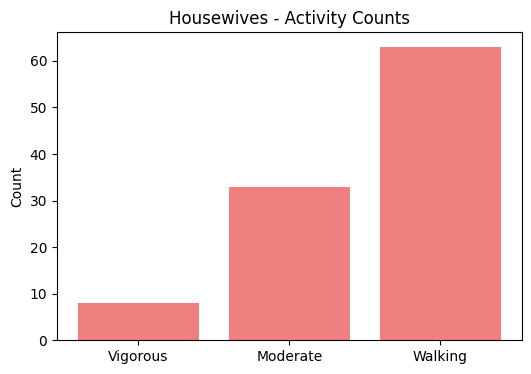

In [19]:
plt.figure(figsize=(6,4))
plt.bar(["Vigorous", "Moderate", "Walking"],
        [count_housewives_vigorous, count_housewives_moderate, count_housewives_walking],
        color="lightcoral")
plt.title("Housewives - Activity Counts")
plt.ylabel("Count")
plt.show()

The bar graph shows the number of housewives engaged in three types of physical activities: Vigorous, Moderate, and Walking.
The highest number of housewives engage in Walking activities.

A significant number of housewives participate in Moderate activities.

The least number of housewives are involved in Vigorous activities.

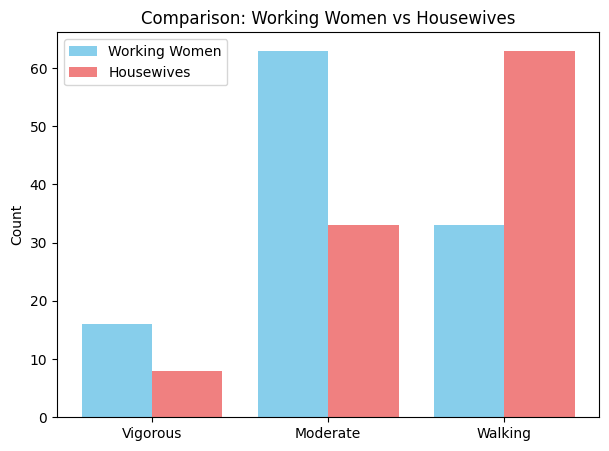

In [20]:
activities = ["Vigorous", "Moderate", "Walking"]
x = range(len(activities))

plt.figure(figsize=(7,5))
plt.bar([i - 0.2 for i in x],
        [count_women_vigorous, count_women_walking, count_women_moderate],
        width=0.4, label="Working Women", color="skyblue")
plt.bar([i + 0.2 for i in x],
        [count_housewives_vigorous, count_housewives_moderate, count_housewives_walking],
        width=0.4, label="Housewives", color="lightcoral")

plt.xticks(x, activities)
plt.title("Comparison: Working Women vs Housewives")
plt.ylabel("Count")
plt.legend()
plt.show()

The grouped bar chart compares the number of working women and housewives engaged in Vigorous, Moderate, and Walking activities.
Vigorous Activity: More working women engage in vigorous activities compared to housewives.

Moderate Activity: Working women significantly outnumber housewives in moderate activity participation.

Walking: Both groups have very similar counts, but housewives slightly exceed working women in walking activity.

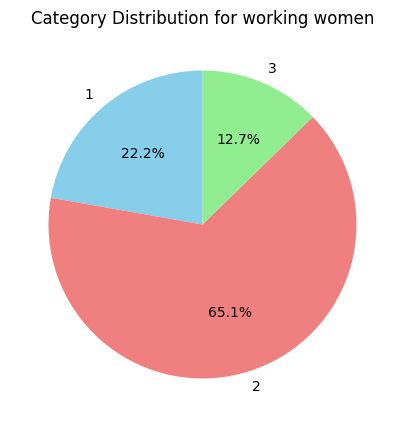

In [21]:
category_counts = working['Category'].value_counts().sort_index()

plt.figure(figsize=(5,5))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["skyblue", "lightcoral", "lightgreen"])
plt.title("Category Distribution for working women")
plt.show()

The pie chart shows the percentage distribution of working women across three activity categories (1, 2, and 3).
Category 2 has the largest proportion (~65.1%), indicating that most working women fall into this intermediate activity level.

Category 1 represents ~22.2%, suggesting a smaller but significant portion of highly active women.

Category 3 accounts for ~12.7%, which represents the least active group.

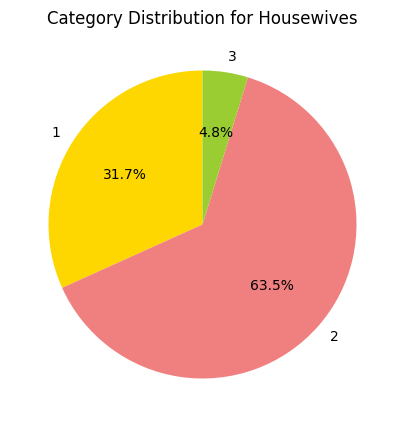

In [22]:
category_counts = housewives['Category'].value_counts().sort_index()

plt.figure(figsize=(5,5))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=["gold", "lightcoral", "yellowgreen"])
plt.title("Category Distribution for Housewives")
plt.show()

The pie chart shows the percentage distribution of housewives across three activity categories (1, 2, and 3).
Category 2 has the largest share (~63.5%), indicating most housewives are in the moderate activity group.

Category 1 accounts for ~31.7%, which is a significantly larger proportion compared to working women.

Category 3 has the smallest share (~4.8%), indicating very few housewives fall into the least active category.

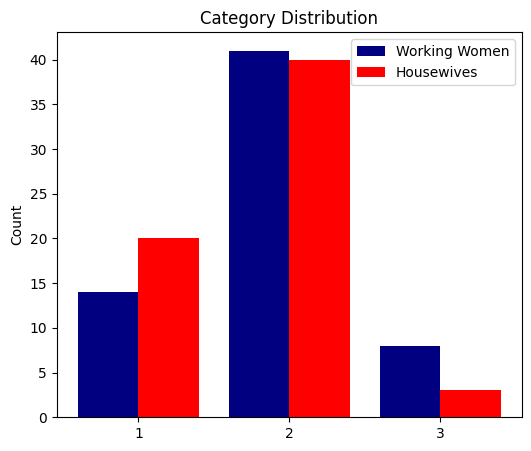

In [51]:
working_counts = working['Category'].value_counts().sort_index()
housewives_counts = housewives['Category'].value_counts().sort_index()

categories = working_counts.index
x = np.arange(len(categories))
width = 0.4

plt.figure(figsize=(6,5))
plt.bar(x - width/2, working_counts, width=width, label="Working Women", color="navy")
plt.bar(x + width/2, housewives_counts, width=width, label="Housewives", color="red")

plt.xticks(x, categories)
plt.title("Category Distribution")
plt.ylabel("Count")
plt.legend()
plt.show()

Category 2 Dominates.

Both Working Women and Housewives have the highest counts in Category 2, showing it is the most common category for both groups.

Working Women have a slightly higher count than Housewives in this category, indicating they are more concentrated here.

Category 1 is More Popular Among Housewives:

Housewives have a significantly higher count than Working Women in Category 1.

This suggests that Category 1 resonates more with Housewives compared to Working Women.

Category 3 is the Least Popular for Both:

Very few individuals fall into Category 3 for both groups.

Working Women still slightly outnumber Housewives here.

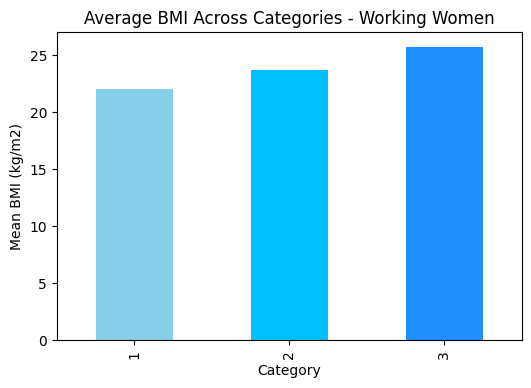

In [24]:
import matplotlib.pyplot as plt

working_bmi = working.groupby("Category")["BMI(kg/m2)"].mean()

plt.figure(figsize=(6,4))
working_bmi.plot(kind="bar", color=["skyblue","deepskyblue","dodgerblue"])
plt.title("Average BMI Across Categories - Working Women")
plt.ylabel("Mean BMI (kg/m2)")
plt.xlabel("Category")
plt.show()


The bar chart shows the average Body Mass Index (BMI) for working women, categorized into three groups.
Category 3 has the highest average BMI, slightly above 25, which falls into the overweight range.

Category 1 has the lowest average BMI, at approximately 22, which is within the healthy weight range.

The chart shows a clear positive correlation, indicating that as the category number increases, the average BMI also increases.

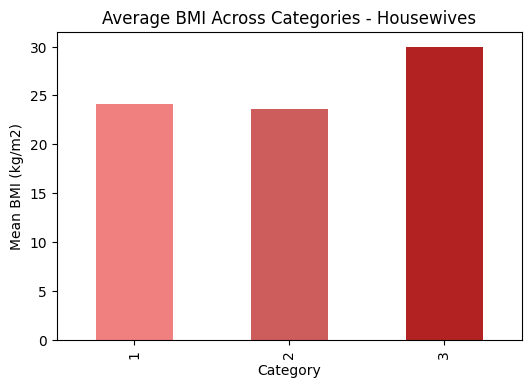

In [25]:

housewives_bmi = housewives.groupby("Category")["BMI(kg/m2)"].mean()

plt.figure(figsize=(6,4))
housewives_bmi.plot(kind="bar", color=["lightcoral","indianred","firebrick"])
plt.title("Average BMI Across Categories - Housewives")
plt.ylabel("Mean BMI (kg/m2)")
plt.xlabel("Category")
plt.show()


The bar chart shows the average Body Mass Index (BMI) for housewives across three categories.
Category 3 has the highest average BMI, at approximately 30, which is in the obese range. This is a significant finding.

Categories 1 and 2 have similar average BMIs, both around 24, which is in the healthy weight range, though close to the overweight threshold of 25.

Unlike working women, there isn't a consistent positive trend across all categories. The BMI for Category 2 is slightly lower than Category 1.

Compare BMI distribution across categories

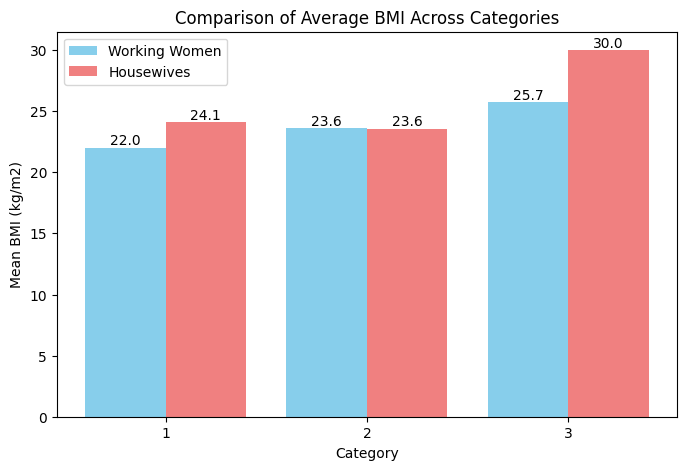

In [26]:
import matplotlib.pyplot as plt

categories = working_bmi.index
x = range(len(categories))

plt.figure(figsize=(8,5))
bars1 = plt.bar([i - 0.2 for i in x], working_bmi, width=0.4, label="Working Women", color="skyblue")
bars2 = plt.bar([i + 0.2 for i in x], housewives_bmi, width=0.4, label="Housewives", color="lightcoral")

plt.xticks(x, categories)
plt.title("Comparison of Average BMI Across Categories")
plt.ylabel("Mean BMI (kg/m2)")
plt.xlabel("Category")
plt.legend()

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom')

plt.show()


The bar chart provides a direct comparison of the average BMI for working women and housewives across three distinct categories.
Category 1: Housewives have a higher average BMI (24.1) than working women (22.0).

Category 2: The average BMI for working women (23.6) and housewives (23.6) is identical.

Category 3: There's a significant difference here. Housewives have a much higher average BMI (30.0) compared to working women (25.7). The housewives' average BMI falls into the obese range, while working women's average is in the overweight range.

The chart reveals that BMI tends to be higher for housewives than for working women, particularly in Categories 1 and 3.

Average IPAQ Score by Occupation

      Occupation  Average IPAQ Score
0  Working Women         1683.968254
1     Housewives         1292.920635


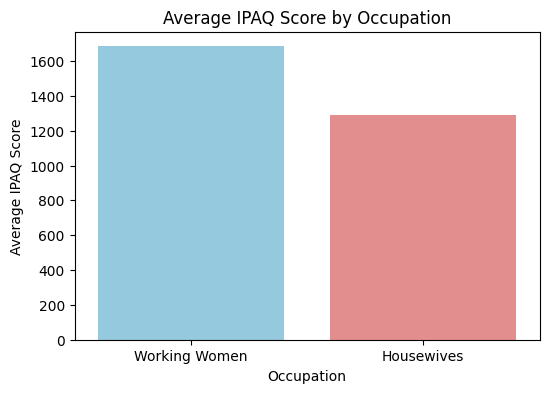

In [27]:
avg_ipaq_working = working["IPAQ Score"].mean()
avg_ipaq_housewives = housewives["IPAQ Score"].mean()


ipaq_df = pd.DataFrame({
    "Occupation": ["Working Women", "Housewives"],
    "Average IPAQ Score": [avg_ipaq_working, avg_ipaq_housewives]
})

print(ipaq_df)

plt.figure(figsize=(6,4))
sns.barplot(x="Occupation", y="Average IPAQ Score", data=ipaq_df, palette=["skyblue","lightcoral"])
plt.title("Average IPAQ Score by Occupation")
plt.ylabel("Average IPAQ Score")
plt.show()

The bar chart shows the average International Physical Activity Questionnaire (IPAQ) score for working women and housewives. A higher IPAQ score indicates a greater level of physical activity.
Working women have a higher average IPAQ score (approximately 1684) compared to housewives (approximately 1293).

This indicates that, on average, working women are more physically active than housewives.

Average sitting hours vs. activity levels.

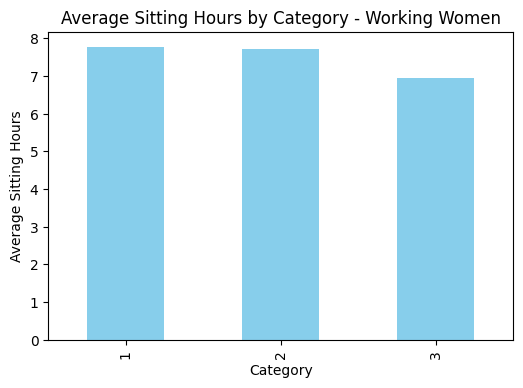

In [28]:
avg_sitting_working = working.groupby("Category")["Sitting(hrs)"].mean()

plt.figure(figsize=(6,4))
avg_sitting_working.plot(kind="bar", color="skyblue")
plt.title("Average Sitting Hours by Category - Working Women")
plt.ylabel("Average Sitting Hours")
plt.xlabel("Category")
plt.show()

The bar chart displays the average number of sitting hours per day for working women, categorized into three groups.

Key Insights
Category 1 has the highest average sitting hours, at approximately 7.8 hours.

Category 2 is a close second, with an average of about 7.7 hours.

Category 3 has the lowest average sitting hours, at around 6.9 hours.

There is a decreasing trend in sitting hours from Category 1 to Category 3.

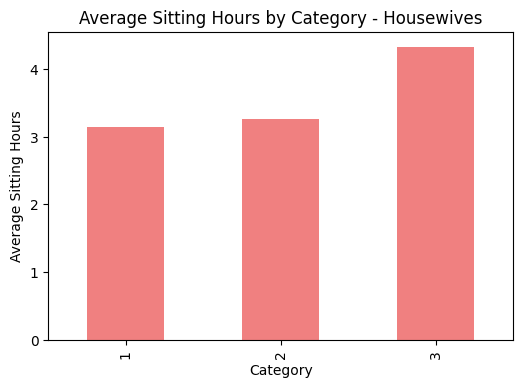

In [29]:
avg_sitting_housewives = housewives.groupby("Category")["Sitting(hrs)"].mean()

plt.figure(figsize=(6,4))
avg_sitting_housewives.plot(kind="bar", color="lightcoral")
plt.title("Average Sitting Hours by Category - Housewives")
plt.ylabel("Average Sitting Hours")
plt.xlabel("Category")
plt.show()

This bar chart shows the average sitting hours per day for housewives across three categories.

Key Insights
Category 3 has the highest average sitting hours, at approximately 4.4 hours.

Category 2 has the second-highest average, with about 3.3 hours.

Category 1 has the lowest average sitting hours, at approximately 3.1 hours.

There's a clear positive trend: as the category number increases, the average sitting hours also increase.

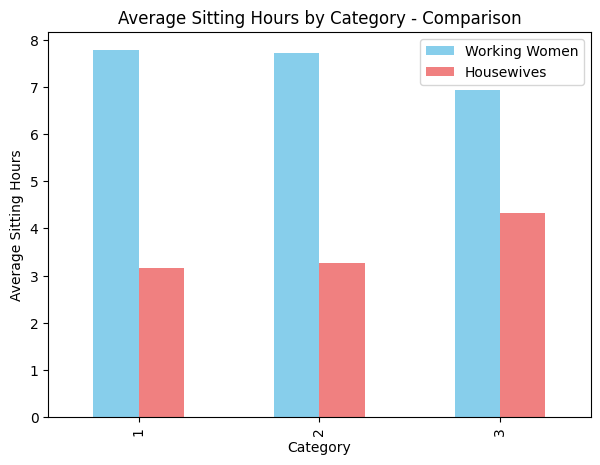

In [30]:
sitting_df = pd.DataFrame({
    "Working Women": avg_sitting_working,
    "Housewives": avg_sitting_housewives
})

sitting_df.plot(kind="bar", figsize=(7,5), color=["skyblue","lightcoral"])
plt.title("Average Sitting Hours by Category - Comparison")
plt.ylabel("Average Sitting Hours")
plt.xlabel("Category")
plt.show()

The bar chart compares the average daily sitting hours for working women and housewives across three distinct categories.

Working women sit significantly more than housewives in all three categories.

Category 1: Working women sit for about 7.8 hours, while housewives sit for about 3.1 hours.

Category 2: Working women average about 7.7 hours of sitting, and housewives average about 3.3 hours.

Category 3: Working women sit for about 6.9 hours, while housewives sit for about 4.3 hours.

For working women, sitting hours decrease from Category 1 to 3. For housewives, sitting hours increase from Category 1 to 3. This is a direct contrast between the two groups.



Compare BMI distribution across categories

Working Women - BMI vs MET Correlation: 0.23312473471252868
Housewives - BMI vs MET Correlation: 0.2766787942680033


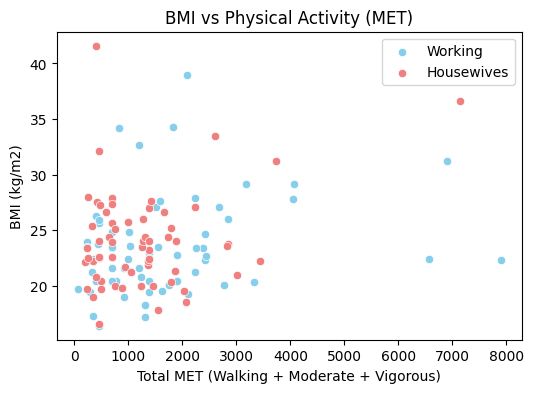

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


working["Total_MET"] = working["Walking(MET)"] + working["Moderate(MET)"] + working["Vigorous(MET)"]
housewives["Total_MET"] = housewives["Walking(MET)"] + housewives["Moderate(MET)"] + housewives["Vigorous(MET)"]


print("Working Women - BMI vs MET Correlation:", working["BMI(kg/m2)"].corr(working["Total_MET"]))
print("Housewives - BMI vs MET Correlation:", housewives["BMI(kg/m2)"].corr(housewives["Total_MET"]))


plt.figure(figsize=(6,4))
sns.scatterplot(x="Total_MET", y="BMI(kg/m2)", data=working, color="skyblue", label="Working")
sns.scatterplot(x="Total_MET", y="BMI(kg/m2)", data=housewives, color="lightcoral", label="Housewives")
plt.title("BMI vs Physical Activity (MET)")
plt.xlabel("Total MET (Walking + Moderate + Vigorous)")
plt.ylabel("BMI (kg/m2)")
plt.legend()
plt.show()


This scatter plot and correlation analysis examine the relationship between a person's physical activity (measured by Total MET score) and their BMI, comparing working women and housewives.

Weak Positive Correlation: The correlation coefficients for both groups are positive but very low: 0.233 for working women and 0.277 for housewives.

No Clear Pattern: The scatter plot shows a wide dispersion of data points. There is no clear trend where a higher physical activity (MET score) consistently leads to a lower BMI. Individuals with very high MET scores can have a wide range of BMIs, and vice-versa.

Outliers: The plot includes a few outliers with very high MET scores and varying BMIs, which may skew the overall correlation.

The weak correlation suggests that while physical activity is important, it is not the sole determinant of BMI. Other factors, such as diet, genetics, metabolism, and sedentary behavior, likely play a more significant role in an individual's BMI.

The scatter plot confirms that a simple, linear relationship between physical activity and BMI does not exist for this population. This highlights the complexity of weight management.

This analysis indicates that BMI is the result of a multifaceted interplay of different lifestyle and biological factors, not just physical activity alone. Therefore, comprehensive health interventions should address multiple variables beyond just physical activity to effectively manage BMI.

Correlation between sitting hours and IPAQ score.

Working Women - Sitting vs IPAQ: -0.0557297362231259
Housewives - Sitting vs IPAQ: 0.1791382243935988


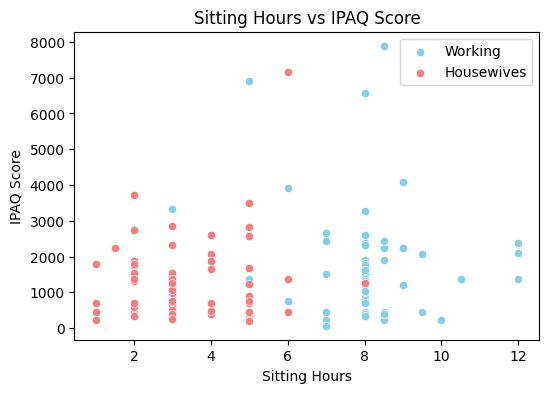

In [32]:

print("Working Women - Sitting vs IPAQ:", working["Sitting(hrs)"].corr(working["IPAQ Score"]))
print("Housewives - Sitting vs IPAQ:", housewives["Sitting(hrs)"].corr(housewives["IPAQ Score"]))


plt.figure(figsize=(6,4))
sns.scatterplot(x="Sitting(hrs)", y="IPAQ Score", data=working, color="skyblue", label="Working")
sns.scatterplot(x="Sitting(hrs)", y="IPAQ Score", data=housewives, color="lightcoral", label="Housewives")
plt.title("Sitting Hours vs IPAQ Score")
plt.xlabel("Sitting Hours")
plt.ylabel("IPAQ Score")
plt.legend()
plt.show()


This scatter plot and correlation analysis examine the relationship between daily sitting hours and physical activity (IPAQ score), comparing working women and housewives.

Working Women: The correlation is negative but very weak (-0.056). The scatter plot shows no discernible pattern. Women with high sitting hours have a wide range of IPAQ scores, and vice versa. This suggests that for working women, more sitting doesn't directly mean less physical activity.

Housewives: The correlation is positive but very weak (0.179). Again, the scatter plot shows no clear trend. A slight positive correlation might indicate that housewives who have more structured days, which could include both more sitting (e.g., for hobbies or planning) and more planned physical activity, have a higher IPAQ score.

Overall: Both correlations are too close to zero to be considered significant. There is no strong linear relationship between sitting hours and physical activity for either group.

Marital Status vs Category

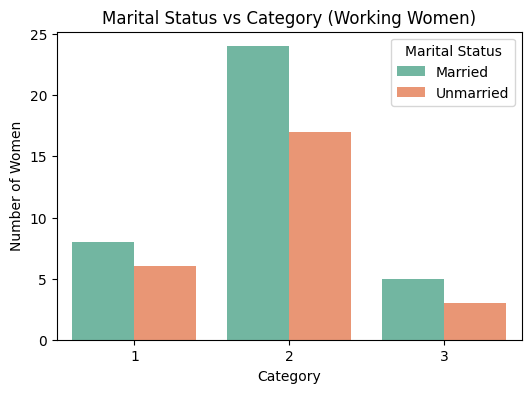

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


marital_working = working.groupby(["Marital Status", "Category"]).size().reset_index(name="Count")

plt.figure(figsize=(6,4))
sns.barplot(x="Category", y="Count", hue="Marital Status", data=marital_working, palette="Set2")
plt.title("Marital Status vs Category (Working Women)")
plt.ylabel("Number of Women")
plt.xlabel("Category")
plt.show()


This chart shows how many married and unmarried working women are in three different activity groups.
Category 2 has the most women, both married and unmarried. This means most working women are in this middle activity group.

In all three groups, there are more married women than unmarried women.

The number of women is much lower in Categories 1 and 3 compared to Category 2.

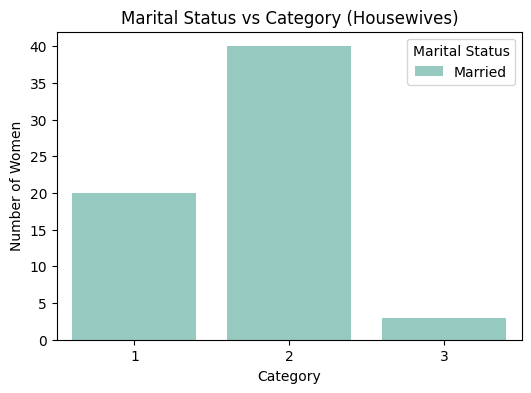

In [34]:

marital_housewives = housewives.groupby(["Marital Status", "Category"]).size().reset_index(name="Count")

plt.figure(figsize=(6,4))
sns.barplot(x="Category", y="Count", hue="Marital Status", data=marital_housewives, palette="Set3")
plt.title("Marital Status vs Category (Housewives)")
plt.ylabel("Number of Women")
plt.xlabel("Category")
plt.show()


The chart only shows data for married women, which suggests that the sample of housewives only included married women.

Category 2 has the highest number of women (around 40). This indicates that the majority of housewives in the sample fall into the moderate activity group.

Category 1 has the second-highest number (around 20), while Category 3 has the lowest number (around 3).

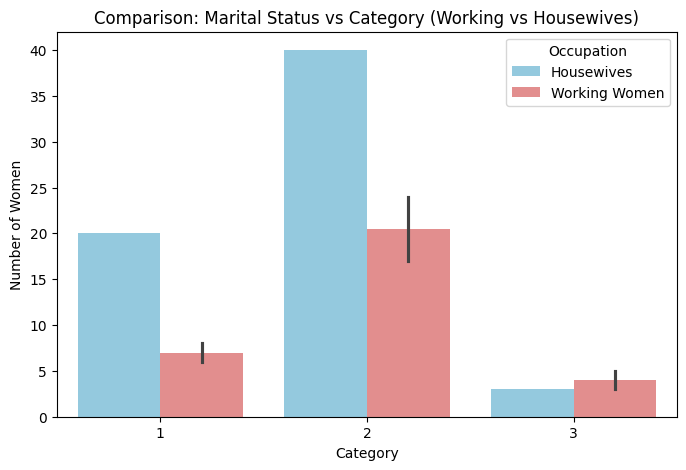

In [35]:
working["Occupation"] = "Working Women"
housewives["Occupation"] = "Housewives"

df = pd.concat([working, housewives])


marital_compare = df.groupby(["Occupation", "Marital Status", "Category"]).size().reset_index(name="Count")

plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Count", hue="Occupation", data=marital_compare, palette=["skyblue","lightcoral"])
plt.title("Comparison: Marital Status vs Category (Working vs Housewives)")
plt.ylabel("Number of Women")
plt.xlabel("Category")
plt.show()

The number of housewives is higher than working women in Category 1 and Category 2.

Category 1: The number of housewives (around 20) is significantly higher than working women (around 7).

Category 2: This category has the highest number of women in both groups. The number of housewives (around 40) is much higher than working women (around 20).

Category 3: The number of working women (around 4) is slightly higher than housewives (around 3). Both numbers are very low.

Age Groups vs IPAQ Score

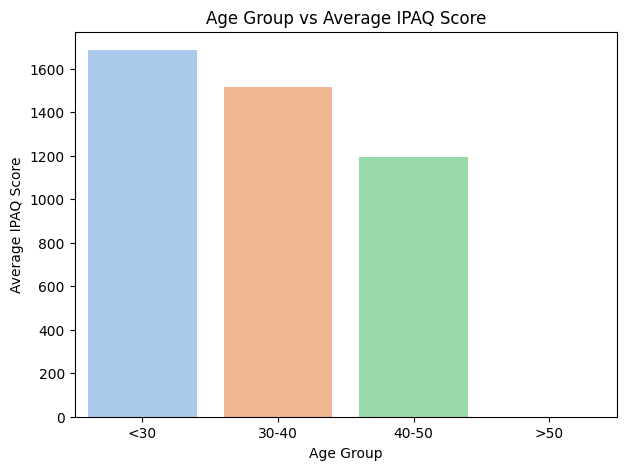

In [36]:

bins = [0, 30, 40, 50, 100]
labels = ["<30", "30-40", "40-50", ">50"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)


age_ipaq = df.groupby("AgeGroup")["IPAQ Score"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x="AgeGroup", y="IPAQ Score", data=age_ipaq, palette="pastel")
plt.title("Age Group vs Average IPAQ Score")
plt.ylabel("Average IPAQ Score")
plt.xlabel("Age Group")
plt.show()


This bar chart shows the average physical activity level (IPAQ score) for women across different age groups.
Younger women are the most active. The <30 age group has the highest average IPAQ score, at over 1600.

Activity levels decrease with age. The average IPAQ score drops steadily from the <30 group to the 40-50 group.

The 40-50 age group has the lowest average IPAQ score, at around 1200.

There is no data available for the >50 age group.

Compare BMI ranges (underweight, normal, overweight, obese) with physical activity levels.

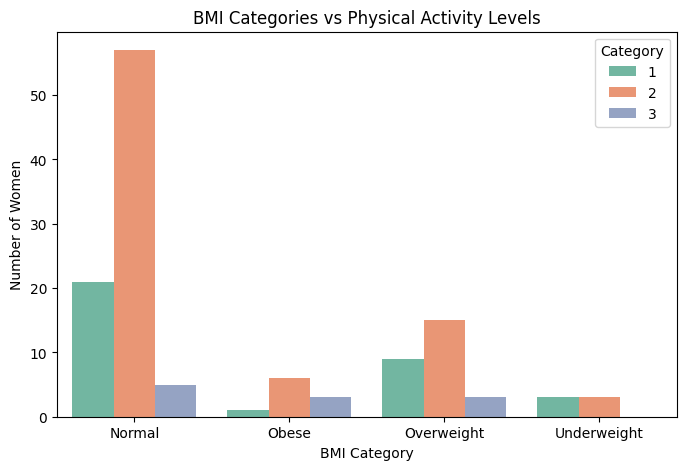

In [37]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"


working["BMI_Category"] = working["BMI(kg/m2)"].apply(bmi_category)
housewives["BMI_Category"] = housewives["BMI(kg/m2)"].apply(bmi_category)


df = pd.concat([working.assign(Occupation="Working Women"),
                housewives.assign(Occupation="Housewives")])


bmi_activity = df.groupby(["BMI_Category", "Category"]).size().reset_index(name="Count")


plt.figure(figsize=(8,5))
sns.barplot(x="BMI_Category", y="Count", hue="Category", data=bmi_activity, palette="Set2")
plt.title("BMI Categories vs Physical Activity Levels")
plt.ylabel("Number of Women")
plt.xlabel("BMI Category")
plt.show()

This bar chart shows the distribution of women across different BMI categories (Normal, Obese, Overweight, and Underweight), with a breakdown by their physical activity level (Categories 1, 2, and 3).
Category 2 dominates all BMI categories. The majority of women in every single BMI category—Normal, Obese, Overweight, and Underweight—are in Category 2, which represents a moderate level of physical activity.

The Normal BMI category is the most common. It has the highest number of women overall, and the vast majority of these women are in Category 2.

The "Obese" and "Overweight" groups are not concentrated in the least active category. While one might expect women with higher BMI to be in Category 3 (the least active), they are overwhelmingly in Category 2. This is a very interesting finding.

Category 1 (most active) has a notable presence in the "Normal" BMI group. This suggests a strong link between being highly active and maintaining a normal weight.

Are Overweight/Obese Individuals Doing Less Vigorous Activity?

  BMI_Category  Vigorous(MET)
0       Normal     271.903614
1        Obese     960.000000
2   Overweight     266.666667
3  Underweight       0.000000


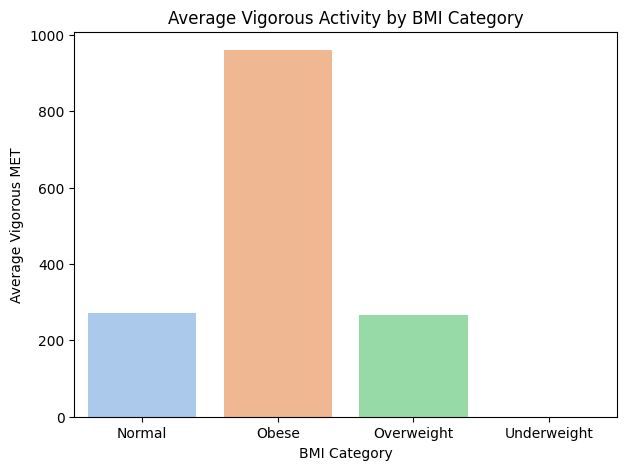

In [38]:

vigorous_bmi = df.groupby("BMI_Category")["Vigorous(MET)"].mean().reset_index()

print(vigorous_bmi)

plt.figure(figsize=(7,5))
sns.barplot(x="BMI_Category", y="Vigorous(MET)", data=vigorous_bmi, palette="pastel")
plt.title("Average Vigorous Activity by BMI Category")
plt.ylabel("Average Vigorous MET")
plt.xlabel("BMI Category")
plt.show()


This bar chart shows the average amount of vigorous physical activity (measured in METs) for women in different BMI categories. A higher MET score means more vigorous activity.

The Obese BMI category has the highest average vigorous activity, with an average MET score of 960.

The "Normal" and "Overweight" categories have very similar, and much lower, average vigorous activity levels (around 272 and 267, respectively).

The "Underweight" category has an average of 0, which means no one in this BMI category reported any vigorous activity.

Percentage of people sitting >6 hours/day vs <6 hours.

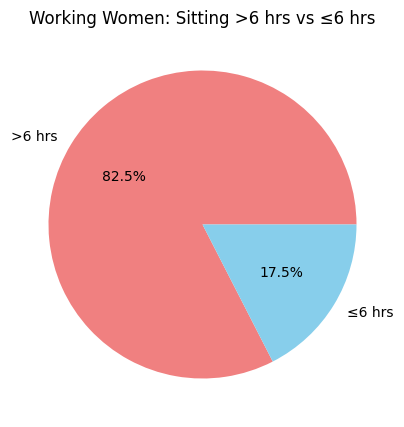

In [39]:
working["Sedentary"] = working["Sitting(hrs)"].apply(lambda x: ">6 hrs" if x > 6 else "≤6 hrs")
sedentary_working = working["Sedentary"].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
sedentary_working.plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral","skyblue"])
plt.title("Working Women: Sitting >6 hrs vs ≤6 hrs")
plt.ylabel("")
plt.show()

The pie chart shows the percentage of working women who sit for more than 6 hours per day versus those who sit for 6 hours or less.

The vast majority of working women sit for long hours. An overwhelming 82.5% of working women reported sitting for more than 6 hours per day.

Only a small minority of working women (17.5%) sit for 6 hours or less each day.

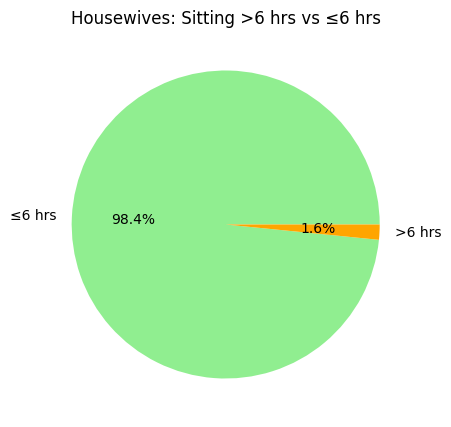

In [40]:
housewives["Sedentary"] = housewives["Sitting(hrs)"].apply(lambda x: ">6 hrs" if x > 6 else "≤6 hrs")
sedentary_housewives = housewives["Sedentary"].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
sedentary_housewives.plot(kind="pie", autopct="%1.1f%%", colors=["lightgreen","orange"])
plt.title("Housewives: Sitting >6 hrs vs ≤6 hrs")
plt.ylabel("")
plt.show()

The pie chart shows the percentage of housewives who sit for more than 6 hours per day versus those who sit for 6 hours or less.

Key Insights
The vast majority of housewives do not sit for long hours. A remarkable 98.4% of housewives reported sitting for 6 hours or less per day.

Only a few fraction of housewives (1.6%) sit for more than 6 hours each day.

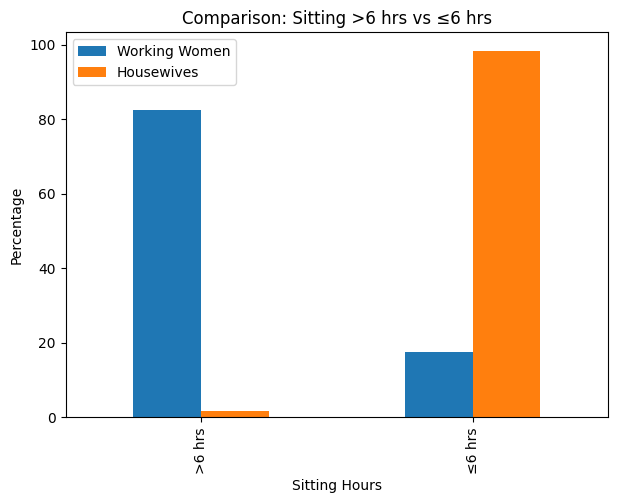

In [41]:
import pandas as pd
comparison_df = pd.DataFrame({
    "Working Women": sedentary_working,
    "Housewives": sedentary_housewives
})

comparison_df.plot(kind="bar", figsize=(7,5))
plt.title("Comparison: Sitting >6 hrs vs ≤6 hrs")
plt.ylabel("Percentage")
plt.xlabel("Sitting Hours")
plt.show()

The bar chart provides a direct comparison of the percentage of working women and housewives who sit for long hours (>6 hours) versus short hours (≤6 hours).

Working women are overwhelmingly long sitters. Over 80% of working women sit for more than 6 hours per day. Conversely, less than 2% of housewives do the same.

Housewives are overwhelmingly short sitters. Nearly 100% of housewives sit for 6 hours or less each day. In contrast, only around 18% of working women fall into this category.

The chart shows a dramatic and complete reversal in sedentary behavior between the two groups. A working woman is highly likely to be sedentary in terms of sitting, while a housewife is highly likely to not be.

Compare sitting time with activity levels.

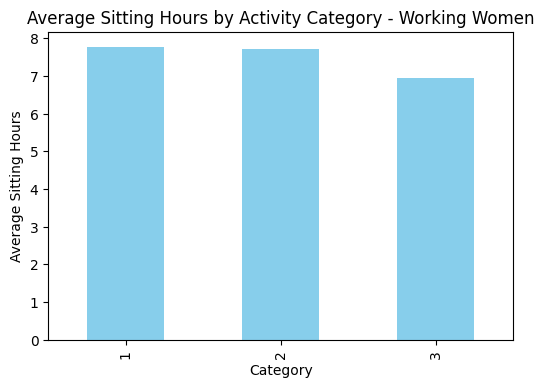

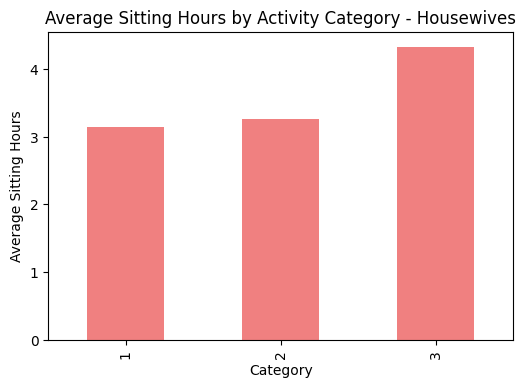

In [42]:
avg_sitting_working = working.groupby("Category")["Sitting(hrs)"].mean()
avg_sitting_housewives = housewives.groupby("Category")["Sitting(hrs)"].mean()

plt.figure(figsize=(6,4))
avg_sitting_working.plot(kind="bar", color="skyblue")
plt.title("Average Sitting Hours by Activity Category - Working Women")
plt.ylabel("Average Sitting Hours")
plt.xlabel("Category")
plt.show()

plt.figure(figsize=(6,4))
avg_sitting_housewives.plot(kind="bar", color="lightcoral")
plt.title("Average Sitting Hours by Activity Category - Housewives")
plt.ylabel("Average Sitting Hours")
plt.xlabel("Category")
plt.show()

The bar charts show the average daily sitting hours for working women and housewives across three activity categories.

Working Women: There is a decreasing trend in sitting hours from Category 1 (around 7.8 hours) to Category 3 (around 6.9 hours). This suggests that working women in the more active categories (1 and 2) tend to sit more than those in the least active category (3).

Housewives: There is a clear increasing trend in sitting hours from Category 1 (around 3.1 hours) to Category 3 (around 4.4 hours). This indicates that housewives in the least active category sit the most.

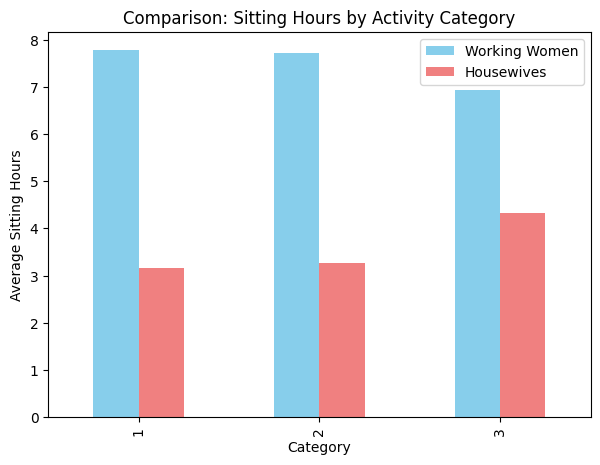

In [43]:
sitting_compare = pd.DataFrame({
    "Working Women": avg_sitting_working,
    "Housewives": avg_sitting_housewives
})

sitting_compare.plot(kind="bar", figsize=(7,5), color=["skyblue","lightcoral"])
plt.title("Comparison: Sitting Hours by Activity Category")
plt.ylabel("Average Sitting Hours")
plt.xlabel("Category")
plt.show()

The bar chart compares the average daily sitting hours for working women and housewives across three activity categories.

Working women sit significantly more than housewives in all three categories.

Category 1: Working women sit for about 7.8 hours, while housewives sit for about 3.2 hours.

Category 2: Working women average about 7.7 hours of sitting, and housewives average about 3.3 hours.

Category 3: Working women sit for about 6.9 hours, while housewives sit for about 4.3 hours.

For working women, sitting hours decrease from Category 1 to 3. For housewives, sitting hours increase from Category 1 to 3. This is a direct contrast between the two groups.

Pie chart showing sedentary vs active distribution.

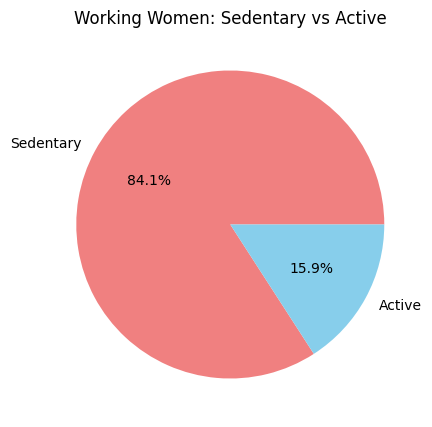

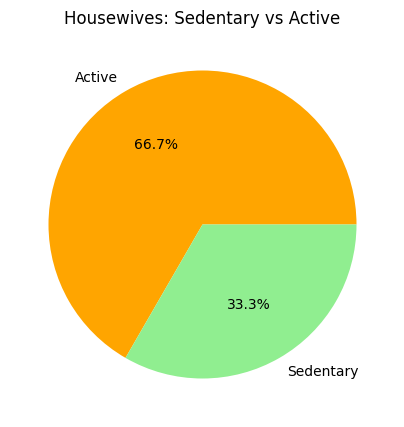

In [44]:
working["Lifestyle"] = working.apply(lambda row: "Sedentary" if (row["Sitting(hrs)"] > 6 or row["Category"] == 1) else "Active", axis=1)
housewives["Lifestyle"] = housewives.apply(lambda row: "Sedentary" if (row["Sitting(hrs)"] > 6 or row["Category"] == 1) else "Active", axis=1)

lifestyle_working = working["Lifestyle"].value_counts(normalize=True) * 100
lifestyle_housewives = housewives["Lifestyle"].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
lifestyle_working.plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral","skyblue"])
plt.title("Working Women: Sedentary vs Active")
plt.ylabel("")
plt.show()

plt.figure(figsize=(5,5))
lifestyle_housewives.plot(kind="pie", autopct="%1.1f%%", colors=["orange","lightgreen"])
plt.title("Housewives: Sedentary vs Active")
plt.ylabel("")
plt.show()


The pie charts show the percentage distribution of working women and housewives based on a simplified classification of their lifestyle as either sedentary or active. The classification is determined by a combination of sitting hours and activity category.
Working women are overwhelmingly sedentary. An impressive 84.1% of working women are classified as having a sedentary lifestyle. Only 15.9% are considered active. This is a very skewed distribution.

Housewives are predominantly active. In contrast, a significant majority of housewives (66.7%) are classified as active. Only 33.3% of housewives are considered sedentary.

There is a stark and opposite contrast between the two occupations. A working woman is far more likely to have a sedentary lifestyle, while a housewife is far more likely to have an active one.

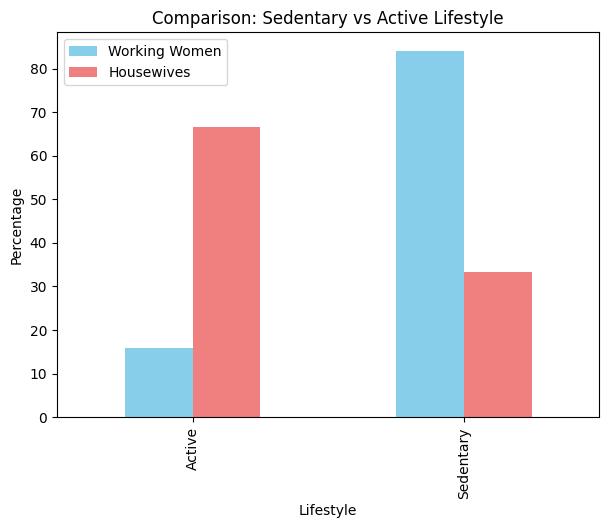

In [45]:
lifestyle_compare = pd.DataFrame({
    "Working Women": lifestyle_working,
    "Housewives": lifestyle_housewives
})

lifestyle_compare.plot(kind="bar", figsize=(7,5), color=["skyblue","lightcoral"])
plt.title("Comparison: Sedentary vs Active Lifestyle")
plt.ylabel("Percentage")
plt.xlabel("Lifestyle")
plt.show()

This bar chart compares the percentage of working women and housewives who have a sedentary versus an active lifestyle.

The majority of working women have a sedentary lifestyle, with over 80% falling into this category.

In contrast, the majority of housewives have an active lifestyle, with over 65% in this group.

The percentages are almost opposite for the two groups: a very small percentage of working women are considered active, while a very small percentage of housewives are considered sedentary.

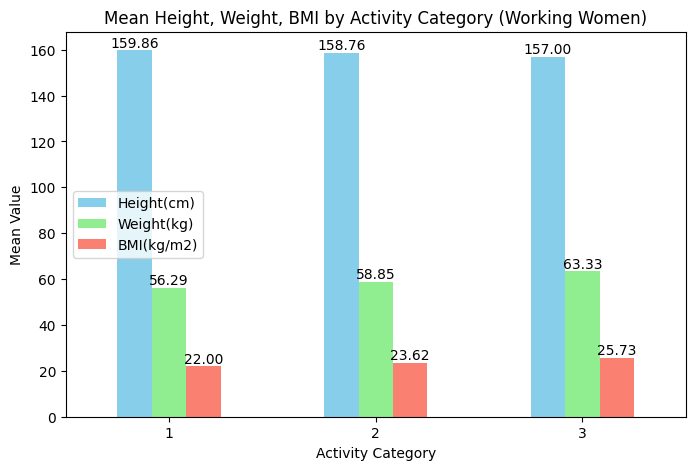

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

category_means = working.groupby("Category")[["Height(cm)", "Weight(kg)", "BMI(kg/m2)"]].mean()

ax = category_means.plot(kind="bar", figsize=(8,5), color=["skyblue","lightgreen","salmon"])

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.title("Mean Height, Weight, BMI by Activity Category (Working Women)")
plt.ylabel("Mean Value")
plt.xlabel("Activity Category")
plt.xticks(rotation=0)
plt.show()


This bar chart shows the average height, weight, and BMI for working women across three different activity categories.

Height remains stable: The average height is very similar across all three categories (around 158-160 cm), suggesting that height is not a factor that varies with activity category.

Weight and BMI increase with category number: As the category number increases from 1 to 3, both the average weight and average BMI also increase.

Category 1 has the lowest average weight (56.29 kg) and BMI (22.00). This group is, on average, within the healthy weight range.

Category 3 has the highest average weight (63.33 kg) and BMI (25.73). This group is, on average, in the overweight range.

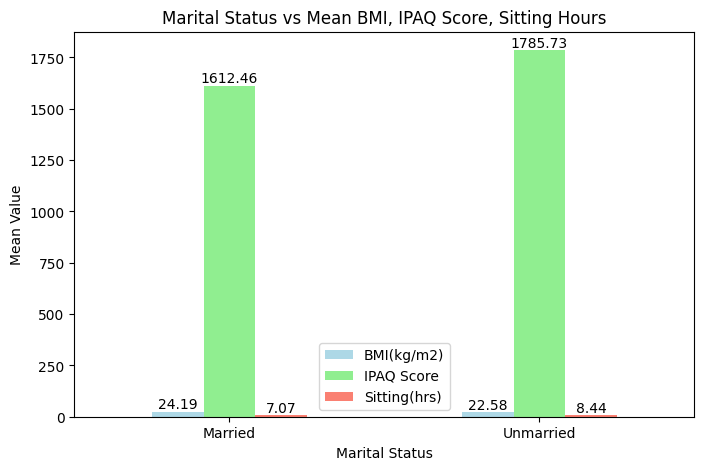

In [47]:
marital_means = working.groupby("Marital Status")[["BMI(kg/m2)", "IPAQ Score", "Sitting(hrs)"]].mean()

ax = marital_means.plot(kind="bar", figsize=(8,5), color=["lightblue","lightgreen","salmon"])

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")

plt.title("Marital Status vs Mean BMI, IPAQ Score, Sitting Hours")
plt.ylabel("Mean Value")
plt.xlabel("Marital Status")
plt.xticks(rotation=0)
plt.show()


The bar chart compares the mean values for BMI, IPAQ Score, and sitting hours between married and unmarried working women.

BMI: Married women have a slightly higher average BMI (24.19) than unmarried women (22.58).

IPAQ Score: Unmarried women have a significantly higher average IPAQ score (1785.73) than married women (1612.46). This suggests unmarried women are, on average, more physically active.

Sitting Hours: Married women spend slightly less time sitting (7.07 hours) than unmarried women (8.44 hours).